# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hri_tools import HumorDataset
from hri_tools import SUPPORTED_DATASETS
from hri_tools import downlaod
from hri_tools import calc_divergence
from hri_tools import calc_divergence_between_target
from hri_tools import calc_vocab_for_labels

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import copy

# Download datasets

In [5]:
%env HRI_URL=###PASTE HERE###
%env HRI_PASSWORD=###PASTE HERE###

env: HRI_URL=###PASTE HERE###
env: HRI_PASSWORD=###PASTE HERE###


In [6]:
# downlaod()

# Load datasets and get statistics

In [5]:
print(SUPPORTED_DATASETS)

['pun_of_the_day', 'one_liners', 'reddit_jokes_last_laught', 'short_jokes', 'funlines_v1', 'human_microedit_v1', 'funlines_v2', 'human_microedit_v2', 'unfun_me', 'semeval_2021_task_7', 'semeval_2017_task_7', 'the_naughtyformer']


In [6]:
all_data = list()
for name in SUPPORTED_DATASETS:
    all_data.append(
        HumorDataset(
            name=name
        )
    )

for i in range(len(all_data)):
    all_data[i].load()

In [7]:
for i in range(len(all_data)):
    all_data[i].calc_statistics()

for i in range(len(all_data)):
    all_data[i].print_statistics_report()


        Statistics report for pun_of_the_day dataset:
        Number of samples: 4826, pos - 2423, neg - 2403.
        Mean word length is 13.515748031496063
        Mean length by symbols is 66.64981351015334 (without space is 54.13966017405719)
        

        Statistics report for one_liners dataset:
        Number of samples: 32000, pos - 16000, neg - 16000.
        Mean word length is 12.58109375
        Mean length by symbols is 58.6513125 (without space is 48.99703125)
        

        Statistics report for reddit_jokes_last_laught dataset:
        Number of samples: 20654, pos - 10327, neg - 10327.
        Mean word length is 68.35726735741261
        Mean length by symbols is 303.4737096930377 (without space is 250.13973080275008)
        

        Statistics report for short_jokes dataset:
        Number of samples: 463315, pos - 231658, neg - 231657.
        Mean word length is 46.093908032332216
        Mean length by symbols is 232.2224598815061 (without space is 194.8

In [11]:
# for i in range(len(all_data)):
#     all_data[i].print_positive_sample()

# Working with vocab

In [8]:
for i in range(len(all_data)):
    all_data[i].run_preprocessing()

for i in range(len(all_data)):
    all_data[i].build_vocab()

In [9]:
print(calc_divergence(all_data[0], all_data[1]))

{'Symmetrised KL divergence': 1.400427107710352, 'Jensen–Shannon divergence': None}


In [10]:
print(calc_divergence(all_data[1], all_data[0]))

{'Symmetrised KL divergence': 1.400427107710352, 'Jensen–Shannon divergence': None}


In [11]:
symmetrised_kl_divergence = list()
jensen_shannon_divergence = list()

for i in range(len(all_data)):
    for j in range(len(all_data)):
        result = calc_divergence(all_data[i], all_data[j])
        symmetrised_kl_divergence.append(
            (all_data[i].name, all_data[j].name, result['Symmetrised KL divergence'])
        )

        jensen_shannon_divergence.append(
            (all_data[i].name, all_data[j].name, result['Jensen–Shannon divergence'])
        )

In [12]:
df_stat = pd.DataFrame(symmetrised_kl_divergence, columns =['Dataset_x', 'Dataset_y', 'Score'])
df_stat_pivot_symmetrised_kl = df_stat.pivot('Dataset_x', 'Dataset_y','Score')
df_stat_pivot_symmetrised_kl = df_stat_pivot_symmetrised_kl.reindex(sorted(df_stat_pivot_symmetrised_kl.columns), axis=1)

In [13]:
df_stat_pivot_symmetrised_kl

Dataset_y,funlines_v1,funlines_v2,human_microedit_v1,human_microedit_v2,one_liners,pun_of_the_day,reddit_jokes_last_laught,semeval_2017_task_7,semeval_2021_task_7,short_jokes,the_naughtyformer,unfun_me
Dataset_x,,,,,,,,,,,,
funlines_v1,0.000000,0.065983,1.531687,1.478303,3.858016,3.962102,4.748378,4.084953,4.077420,3.584537,2.852767,3.648130
funlines_v2,0.065983,0.000000,1.514683,1.432078,3.885762,3.996316,4.799600,4.099404,4.133753,3.926915,2.915697,3.612765
human_microedit_v1,1.531687,1.514683,0.000000,0.105689,3.793581,3.860269,4.528363,4.044662,4.056471,3.333626,2.581726,3.632046
human_microedit_v2,1.478303,1.432078,0.105689,0.000000,3.874656,3.993587,4.637193,4.142932,4.166237,3.952490,2.700814,3.569020
one_liners,3.858016,3.885762,3.793581,3.874656,0.000000,1.400427,1.605290,1.662406,1.105164,1.559257,1.961395,3.554466
pun_of_the_day,3.962102,3.996316,3.860269,3.993587,1.400427,0.000000,1.852443,0.851644,1.490491,3.095877,2.773442,3.998511
reddit_jokes_last_laught,4.748378,4.799600,4.528363,4.637193,1.605290,1.852443,0.000000,2.279232,1.172113,1.913101,2.602734,4.643223
semeval_2017_task_7,4.084953,4.099404,4.044662,4.142932,1.662406,0.851644,2.279232,0.000000,1.797530,3.784061,3.299864,3.957350
semeval_2021_task_7,4.077420,4.133753,4.056471,4.166237,1.105164,1.490491,1.172113,1.797530,0.000000,1.818580,2.133497,3.690252


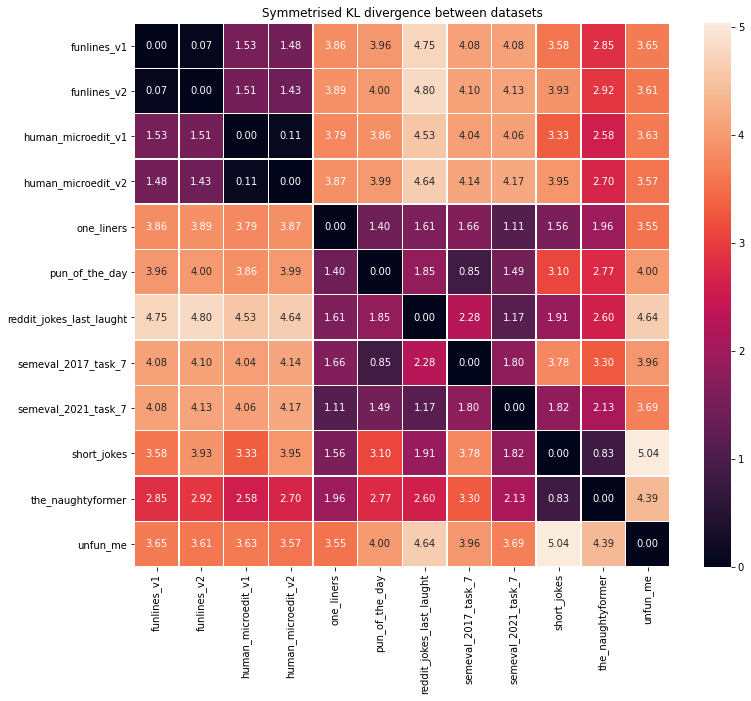

In [14]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df_stat_pivot_symmetrised_kl, annot=True, fmt=".2f", ax=ax, linewidth=.5)
ax.set(xlabel="", ylabel="")
plt.title('Symmetrised KL divergence between datasets')
plt.savefig('Symmetrised KL divergence between datasets.png')

# Show vocab size

In [15]:
for i in range(len(all_data)):
    print(f'{all_data[i].name} | vocab_size:{all_data[i].vocab_size} | non unique words: {all_data[i].non_unique_words}')

pun_of_the_day | vocab_size:7491 | non unique words: 65227
one_liners | vocab_size:27905 | non unique words: 338553
reddit_jokes_last_laught | vocab_size:38128 | non unique words: 1108446
short_jokes | vocab_size:579276 | non unique words: 17708079
funlines_v1 | vocab_size:13160 | non unique words: 179302
human_microedit_v1 | vocab_size:13596 | non unique words: 248561
funlines_v2 | vocab_size:11262 | non unique words: 107789
human_microedit_v2 | vocab_size:10130 | non unique words: 98693
unfun_me | vocab_size:6300 | non unique words: 33905
semeval_2021_task_7 | vocab_size:17163 | non unique words: 208819
semeval_2017_task_7 | vocab_size:7916 | non unique words: 43985
the_naughtyformer | vocab_size:111802 | non unique words: 9300620


In [16]:
for dh in all_data:
    print(dh.name, calc_divergence_between_target(copy.deepcopy(dh)))

pun_of_the_day 1.327409729032495
one_liners 1.7094590022191658
reddit_jokes_last_laught 0.9535245077553267
short_jokes 2.4917001397640286
funlines_v1 0.267372441407745
human_microedit_v1 0.26494217866682124
funlines_v2 0.8793075544002895
human_microedit_v2 1.0468635495106073
unfun_me 0.5073552837953553
semeval_2021_task_7 1.4900811009992587
semeval_2017_task_7 2.289369003430039
the_naughtyformer 4.167314878598507


In [17]:
all_data = list()
for name in SUPPORTED_DATASETS:
    all_data.append(
        HumorDataset(
            name=name
        )
    )

for i in range(len(all_data)):
    all_data[i].load()

for dh in all_data:
    print(calc_vocab_for_labels(dh))

pun_of_the_day
positive target 6803 32048 0.21227533699450823
negative target 3309 33179 0.09973175803972392

one_liners
positive target 16379 198043 0.08270426119580092
negative target 19215 140510 0.13675183260977866

reddit_jokes_last_laught
positive target 14935 774851 0.019274673453347806
negative target 31476 333595 0.09435393216325184

short_jokes
positive target 76167 4047431 0.018818603701953165
negative target 545320 13660648 0.03991904337188104

funlines_v1
positive target 12715 93629 0.13580194170609533
negative target 10420 85673 0.1216252494951735

human_microedit_v1
positive target 13489 168505 0.0800510370612148
negative target 9434 80056 0.11784251024283002

funlines_v2
positive target 5772 22116 0.2609875203472599
negative target 10420 85673 0.1216252494951735

human_microedit_v2
positive target 4767 18637 0.255781509899662
negative target 9434 80056 0.11784251024283002

unfun_me
positive target 4643 10934 0.42463874154014997
negative target 5841 22971 0.2542771320360